In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
! pip3 install -r /content/gdrive/MyDrive/cdt-gnn-returns/asos-gnn-returns-requirements-colab.txt

path = '/content/gdrive/MyDrive/cdt-gnn-returns/src'
os.chdir(path)
print(os.getcwd())
from io import RawIOBase
from typing import Callable, List, Optional
import os.path as osp
import torch
from torch_geometric.data import (HeteroData, InMemoryDataset, download_url,extract_zip)

import pandas as pd

Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████▎               | 834.1 MB 1.2 MB/s eta 0:11:24tcmalloc: large alloc 1147494400 bytes == 0x317c000 @  0x7f883eea6615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████▋           | 1055.7 MB 1.2 MB/s eta 0:08:22tcmalloc: large alloc 1434370048 bytes == 0x477d2000 @  0x7f883eea6615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |██████████████████████████▏     | 1336.2 MB 75.4

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
class ASOSGnnDataNode2Vec(InMemoryDataset):
    r"""A heterogeneous rating dataset, assembled by GroupLens Research from
    the `MovieLens web site <https://movielens.org>`_, consisting of nodes of
    type :obj:`"movie"` and :obj:`"user"`.
    User ratings for movies are available as ground truth labels for the edges
    between the users and the movies :obj:`("user", "rates", "movie")`.

    Args:
        root (string): Root directory where the dataset should be saved.
        transform (callable, optional): A function/transform that takes in an
            :obj:`torch_geometric.data.HeteroData` object and returns a
            transformed version. The data object will be transformed before
            every access. (default: :obj:`None`)
        pre_transform (callable, optional): A function/transform that takes in
            an :obj:`torch_geometric.data.HeteroData` object and returns a
            transformed version. The data object will be transformed before
            being saved to disk. (default: :obj:`None`)
        model_name (str): Name of model used to transform movie titles to node
            features. The model comes from the`Huggingface SentenceTransformer
            <https://huggingface.co/sentence-transformers>`_.
    """

    def __init__(self, load_path, transform: Optional[Callable] = None,
                 pre_transform: Optional[Callable] = None,
                 test: Optional[bool] = False,
                 product_links: Optional[str or bool] = False,
                 country_links: Optional[str or bool] = False,
                 model_name: Optional[str] = "asos-gnn-model"):
        self.model_name = model_name
        self.test = test
        self.load_path = load_path
        self.product_links = product_links if product_links == "virtual" or product_links == "direct" else False
        self.country_links = country_links if country_links == "virtual" or country_links == "direct" else False
        self.transform = None
        super().__init__(load_path, transform,test, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

        
    reduced = 1
    
    @property
    def raw_file_names(self) -> List[str]:
        """
        Required by PyG
        """
        if self.test:
            # return [
            #     osp.join('gnn_reduced_data', 'customer_nodes_training_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'product_nodes_training_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'event_table_testing_FULL.csv'),
            # ]
            return [
                osp.join('gnn_reduced_data', 'top_customers_training_v2.csv'),
                osp.join('gnn_reduced_data', 'top_products_training_v2.csv'),
                osp.join('gnn_reduced_data', 'top_events_testing_v2.csv')
            ]
            # return [
            #     osp.join('gnn_reduced_data', 'customer_nodes_training_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'product_nodes_training_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'events_test.csv'),
            # ]
            # return [
            #     osp.join('gnn_reduced_data', 'customers_training_sample_v2.csv'),
            #     osp.join('gnn_reduced_data', 'products_training_sample_v2.csv'),
            #     osp.join('gnn_reduced_data', 'events_test.csv'),
            # ]
        else:
            # return [
            #     osp.join('gnn_reduced_data', 'customer_nodes_training_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'product_nodes_training_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'event_table_training_FULL.csv'),
            # ]
            return [
                osp.join('gnn_reduced_data', 'top_customers_training_v2.csv'),
                osp.join('gnn_reduced_data', 'top_products_training_v2.csv'),
                osp.join('gnn_reduced_data', 'top_events_training_v2.csv')
            ]
            # return [
            #     osp.join('gnn_reduced_data', 'customer_nodes_training_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'product_nodes_training_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'events_train.csv'),
            # ]
            # return [
            #     osp.join('gnn_reduced_data', 'customers_training_sample_v2.csv'),
            #     osp.join('gnn_reduced_data', 'products_training_sample_v2.csv'),
            #     osp.join('gnn_reduced_data', 'events_train.csv'),
            # ]
       
    @property
    def processed_file_names(self) -> str:
        return f'data_node2vec_reduced_{self.model_name}.pt'
        
    def add_variant_product_links(self, data, products, link_type):
        """
        Method for finding the variant-product links and incorporating these into the graph structure.
        Either by using virtual nodes or by adding direct links.
        """
        # Load in the variant-product links.
        variant_product_links = pd.read_csv(os.path.join(self.load_path, "raw", "gnn_reduced_data", "variant_table_training_top_v2.csv"))
        
        # Find all unique products and label the products dataset with indices from 0 to N (number of products)
        # This is necessary as productID is not a linear variable.
        product_mapping = pd.DataFrame(products["productID"].unique()).reset_index().set_index(0).to_dict()["index"]
        products["product_id"] = products["productID"].map(product_mapping)
        
        # Create a table of variants labelled with their product IDs.
        valid_variant_product_links = variant_product_links.merge(
                                        products[["variantID", "variant_id", "productID", "product_id"]], 
                                        on=["variantID", "productID"], how="inner")

        if link_type == "virtual":
            # Find the source (variant) and destination (product) nodes
            variant_src = torch.tensor(valid_variant_product_links["variant_id"].values)
            product_dst = torch.tensor(valid_variant_product_links["product_id"].values)
            
            # Create the edges.
            var_prod_edge = torch.stack([variant_src, product_dst])
        
            # Get virtual node information (this is currently just averages but could be adapted)
            avg_product_vals = products.drop(["variantID", 
                                          "productID", 
                                          "variant_id"], axis=1).groupby("product_id").mean()
        
            # Add node specific information to the graph product nodes
            data["product"].x = torch.from_numpy(avg_product_vals.to_numpy()).to(torch.float)
            
            # Get a list of indicies for product nodes
            product_nodes = list(range(0, len(avg_product_vals.index.unique())))
        
            data["product"].num_nodes = int(len(product_nodes))
            data['product'].node_index = torch.tensor(product_nodes)
            
            # Add the edges (and reverse edges) to the graph structure
            data['variant', 'belongs_to', 'product'].edge_index = var_prod_edge.to(torch.long)
            data['product', 'includes', 'variant'].edge_index = torch.flip(var_prod_edge.to(torch.long), [0])
            
        elif link_type == "direct":
            # ADD CODE HERE (and delete pass)
            pass
        else:
            pass
        
    def add_customer_country_links(self, data, customers, link_type):
        """
        Method for finding the customer-country links and incorporating these into the graph structure.
        Either by using virtual nodes or by adding direct links.
        """
        # Load in the customer-country links.
        customer_country_links = pd.read_csv(os.path.join(self.load_path, "raw", "gnn_reduced_data", "country_table_training_top_v2.csv"))
        
        # Create a table of customers labelled with their country IDs.
        valid_customer_country_links = customer_country_links.merge(
                                        customers[["customer_id", "hash(customerId)"]], 
                                        on=["hash(customerId)"], how="inner")

        if link_type == "virtual":
            # Find the source (customer) and destination (country) nodes
            customer_src = torch.tensor(valid_customer_country_links["customer_id"].values)
            country_dst = torch.tensor(valid_customer_country_links["countryID"].values)
            
            # Create the edges.
            cus_country_edge = torch.stack([customer_src, country_dst])
            
            # Delete country information as this is now encoded into the graph
            filter_col = [col for col in customers.columns if col.startswith("country_")]
            customers.drop(filter_col, axis=1, inplace=True)
        
            # Get virtual node information (this is currently just averages but could be adapted)
            avg_country_vals = customers.drop(["hash(customerId)", 
                                               "customer_id"], axis=1).groupby("shippingCountry").mean()
        
            # Add node specific information to the graph country nodes
            data["country"].x = torch.from_numpy(avg_country_vals.to_numpy()).to(torch.float)
            
            # Get a list of indicies for country nodes
            country_nodes = list(range(0, len(avg_country_vals.index.unique())))
        
            data["country"].num_nodes = int(len(country_nodes))
            data['country'].node_index = torch.tensor(country_nodes)
            
            # Add the edges (and reverse edges) to the graph structure
            data['customer', 'is_from', 'country'].edge_index = cus_country_edge.to(torch.long)
            data['country', 'from_is', 'customer'].edge_index = torch.flip(cus_country_edge.to(torch.long), [0])
            
        elif link_type == "direct":
            # ADD CODE HERE (and delete pass)
            pass
            
        else:
            pass

    def download(self):
        pass

    def process(self):
        """
        Process method to construct the graph dataset.
        """
        # Define data variable
        data = HeteroData()

        # Read in customer information and perform transformations on this
        df_customers = pd.read_csv(self.raw_paths[0]).dropna()

        # Insert a linear customer ID variable (required for labelling nodes)
        df_customers.insert(0, "customer_id", range(0, len(df_customers)))
        
        # Read in and transform product information
        df_products = pd.read_csv(self.raw_paths[1]).dropna()
        
        # Insert a linear product ID variable (required for labelling nodes)
        df_products.insert(0, "variant_id", range(0, len(df_products)))
        
        # Read in the purchase links and merge with above datasets to ensure 
        # node IDs are included (customer_id -> variant_id)
        df_events = pd.read_csv(self.raw_paths[2]).dropna()
        
        df_events = df_events.merge(df_customers[["hash(customerId)", "customer_id"]], 
                                    on="hash(customerId)", how="inner")

        df_valid_events = df_events.merge(df_products[["variantID", "variant_id"]], 
                                          on="variantID", how="inner")
                
        # Construct the purchase links
        customer_src = torch.tensor(df_valid_events["customer_id"])
        product_dst = torch.tensor(df_valid_events["variant_id"])
        edge_index = torch.stack([customer_src, product_dst])

        # Get the labels for these purchase links
        returned = torch.from_numpy(df_valid_events['isReturned'].values).to(torch.bool)
        
        # Get the indicies for return edges
        return_edge_index = edge_index[:,returned]
        
        # Add extra links
        if self.product_links:
            self.add_variant_product_links(data, df_products, link_type=self.product_links)
            
        if self.country_links:
            self.add_customer_country_links(data, df_customers, link_type=self.country_links)
        
        # Removes ids from node information, add it to index instead.
        df_customers = df_customers.set_index("customer_id")
        df_products = df_products.set_index("variant_id")
        
        # Drop non-useful information
        df_customers.drop(["hash(customerId)", "shippingCountry"], axis=1, inplace=True)
        df_products.drop(["variantID", "productID", "brandDesc", "productType"], axis=1, inplace=True)

        # Add node features for customers and variants
        data['customer'].x = torch.from_numpy(df_customers.to_numpy()).to(torch.float)
        data['variant'].x = torch.from_numpy(df_products.to_numpy()).to(torch.float)
        
        # Add purchase links and labels for these
        data['customer', 'purchases', 'variant'].edge_index = edge_index.to(torch.long)
        data['customer', 'purchases', 'variant'].edge_label = returned.to(torch.long)
        data['variant', 'purchased_by', 'customer'].edge_index = torch.flip(edge_index.to(torch.long), [0])
        
        # create the edge of "customer - returns- product" for both train and test
        data['customer', 'returns', 'variant'].edge_index = return_edge_index.to(torch.long)
        data['variant', 'returned_by', 'customer'].edge_index = torch.flip(return_edge_index.to(torch.long), [0])

        # Add node information for graph
        customer_nodes = int(len(df_customers))
        product_nodes = int(len(df_products))
        data['customer'].num_nodes = customer_nodes
        data['variant'].num_nodes = product_nodes
        
        data['customer'].node_index = torch.tensor(df_customers.index)
        data['variant'].node_index = torch.tensor(df_products.index)
        
        # if self.pre_transform is not None:
        #     data = self.pre_transform(data)

        torch.save(self.collate([data]), self.processed_paths[0])



In [12]:
gnnData = ASOSGnnDataNode2Vec(load_path="../", product_links="virtual", country_links="virtual")
gnnData.process()
gnnData = ASOSGnnDataNode2Vec(load_path="../", product_links="virtual", country_links="virtual")
gnnData.process()
dataset = gnnData.data
dataset.to(device)

/usr/local/lib/python3.7/dist-packages/torch_geometric/data/dataset.py:151: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to delete '../processed' first
  f"The `pre_transform` argument differs from the one used in "


HeteroData(
  product={
    x=[9161, 40],
    num_nodes=9161,
    node_index=[9161]
  },
  country={
    x=[10, 19],
    num_nodes=10,
    node_index=[10]
  },
  customer={
    x=[19075, 19],
    num_nodes=19075,
    node_index=[19075]
  },
  variant={
    x=[19170, 41],
    num_nodes=19170,
    node_index=[19170]
  },
  (variant, belongs_to, product)={ edge_index=[2, 19170] },
  (product, includes, variant)={ edge_index=[2, 19170] },
  (customer, is_from, country)={ edge_index=[2, 19075] },
  (country, from_is, customer)={ edge_index=[2, 19075] },
  (customer, purchases, variant)={
    edge_index=[2, 10702],
    edge_label=[10702]
  },
  (variant, purchased_by, customer)={ edge_index=[2, 10702] },
  (customer, returns, variant)={ edge_index=[2, 8314] },
  (variant, returned_by, customer)={ edge_index=[2, 8314] }
)

In [13]:
gnnData_test = ASOSGnnDataNode2Vec(load_path="../", test = True, product_links="virtual", country_links="virtual")
gnnData_test.process()
gnnData_test = ASOSGnnDataNode2Vec(load_path="../", test=True, product_links="virtual", country_links="virtual")
gnnData_test.process()
testdataset = gnnData_test.data
testdataset

HeteroData(
  product={
    x=[9161, 40],
    num_nodes=9161,
    node_index=[9161]
  },
  country={
    x=[10, 19],
    num_nodes=10,
    node_index=[10]
  },
  customer={
    x=[19075, 19],
    num_nodes=19075,
    node_index=[19075]
  },
  variant={
    x=[19170, 41],
    num_nodes=19170,
    node_index=[19170]
  },
  (variant, belongs_to, product)={ edge_index=[2, 19170] },
  (product, includes, variant)={ edge_index=[2, 19170] },
  (customer, is_from, country)={ edge_index=[2, 19075] },
  (country, from_is, customer)={ edge_index=[2, 19075] },
  (customer, purchases, variant)={
    edge_index=[2, 9422],
    edge_label=[9422]
  },
  (variant, purchased_by, customer)={ edge_index=[2, 9422] },
  (customer, returns, variant)={ edge_index=[2, 6922] },
  (variant, returned_by, customer)={ edge_index=[2, 6922] }
)

In [6]:
from torch_geometric.nn import MetaPath2Vec

metapath = [
    # ("customer", "purchases", "variant"),
    # ("variant", "purchased_by", "customer"),
    ("customer", "returns", "variant"),
    ("variant", "belongs_to", "product"),
    ("product", "includes", "variant"),
    ("variant", "returned_by", "customer"),
    # ("customer", "is_from", "country"),
    # ("country", "from_is", "customer"),
]

# model = MetaPath2Vec(dataset.edge_index_dict,
#                      embedding_dim=128,
#                      metapath=metapath,
#                      walk_length=15,
#                      context_size=7,
#                      walks_per_node=30,
#                      num_negative_samples=5,
#                      sparse=True).to(device)


model = MetaPath2Vec(dataset.edge_index_dict,
                     embedding_dim=128,
                     metapath=metapath,
                     walk_length=10,
                     context_size=7,
                     walks_per_node=5,
                     num_negative_samples=5,
                     sparse=True).to(device)
loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. link embeddings
def link_examples_to_features(link_examples, customer_node, variant_node, binary_operator):
    return np.array([
        binary_operator(customer_node[src], variant_node[dst])
        for src, dst in link_examples
    ])

def link_prediction_classifier(max_iter = 2000):
    lr_clf = LogisticRegressionCV(Cs=10, cv=10, scoring="roc_auc", max_iter=max_iter, 
                                  solver="lbfgs", penalty='l2')
    
    return Pipeline(steps=[("clf", lr_clf)])

# 2. training classifier
def train_link_prediction_model(link_examples, link_labels, customer_node, variant_node, binary_operator):
    clf = link_prediction_classifier()
    link_features = link_examples_to_features(
        link_examples, customer_node.numpy(), variant_node.numpy(), binary_operator
    )
    clf.fit(link_features, link_labels)
    return clf

# 3. and 4. evaluate classifier
def evaluate_link_prediction_model(
    clf, link_examples_test, link_labels_test, customer_node, variant_node, binary_operator
):
    link_features_test = link_examples_to_features(
        link_examples_test, customer_node.numpy(), variant_node.numpy(), binary_operator)
    score = evaluate_scores(clf, link_features_test, link_labels_test)
    return score

def evaluate_scores(clf, link_features, link_labels):
    y_pred = clf.predict(link_features)

    return {
        "accuracy": accuracy_score(link_labels, y_pred),
        "f1_score": f1_score(link_labels, y_pred),
        "precision": precision_score(link_labels, y_pred),
        "recall": recall_score(link_labels, y_pred),
        "predictions" : y_pred
    }

def evaluate_roc_auc(clf, link_features, link_labels):
    predicted = clf.predict_proba(link_features)

    # check which class corresponds to positive links
    positive_column = list(clf.classes_).index(1)
    return roc_auc_score(link_labels, predicted[:, positive_column])

    
def operator_l1(u, v):
    return np.abs(u - v)


def operator_l2(u, v):
    return (u - v) ** 2


def run_link_prediction(binary_operator, examples, labels, customer_node, variant_node, examples_test, labels_test):
    clf = train_link_prediction_model(
        examples, labels, customer_node, variant_node, binary_operator
    )
    score = evaluate_link_prediction_model(
        clf,
        examples_test,
        labels_test,
        customer_node, variant_node,
        binary_operator,
    )

    return {
        "classifier": clf,
        "binary_operator": binary_operator,
        "score": score,
    }


binary_operators = [operator_l1, operator_l2]

In [8]:
import numpy as np
def train(epoch, log_steps=500, eval_steps=1000):
    model.train()
    loss_list = []
    total_loss = 0
    for i, (pos_rw, neg_rw) in enumerate(loader):
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        #loss_list.append(loss)
        loss.backward()
        optimizer.step()

        # total_loss += loss.item()
        # if (i + 1) % log_steps == 0:
        #     print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
        #            f'Loss: {total_loss / log_steps:.4f}'))
        #     total_loss = 0

        # if (i + 1) % eval_steps == 0:
        #     acc, f1 = test()
        #     print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
        #            f'Acc: {acc:.4f}, F1 score: {f1:.3f}'))
    # print(loss)
    return(loss)



@torch.no_grad()
def test(train_ratio=0.1):
    model.eval()

    z_customer = model('customer', batch=dataset.node_index_dict['customer'].to(device)).detach()
    z_product = model('variant', batch=dataset.node_index_dict['variant'].to(device)).detach()

    z = dataset.edge_index_dict["customer", "purchases", "variant"].T
    z_test = testdataset.edge_index_dict["customer", "purchases", "variant"].T

    perm = torch.randperm(z.size(0))
    train_perm = perm[:int(z.size(0) * 0.3)]
    # test_perm = perm[int(z.size(0) * 0.3):]
    
    examples = z[train_perm]
    labels = dataset.edge_label_dict["customer", "purchases", "variant"][train_perm]

    examples_test = z_test
    labels_test = testdataset.edge_label_dict["customer", "purchases", "variant"]
    
    # examples_test = z[test_perm]
    # labels_test = dataset.edge_label_dict["customer", "purchases", "variant"][test_perm]
    
    
    # emb_128 = np.concatenate((z_customer.cpu().numpy(), z_product.cpu().numpy()), axis=0)

    scores = run_link_prediction(operator_l1, examples.cpu(), labels.cpu(), z_customer.cpu(), z_product.cpu(), examples_test.cpu(), labels_test.cpu())["score"]
    # scores = run_link_prediction(operator_l1, examples.cpu(), labels.cpu(), emb_128, examples.cpu(), labels.cpu())["score"]


    return scores["accuracy"], scores["f1_score"], scores["precision"], scores["recall"], scores["predictions"]
   










In [30]:
num_epoch = 100
loss_list = []
for epoch in range(1, num_epoch+1):
    loss = train(epoch)
    if epoch%2 == 0:
      acc, f1, precision, recall, preds = test()
      # acc2, f12, precision2, recall2, preds = test_on_train()
      # print(f'Epoch: {epoch}, Train acc: {100*acc2:.2f}%, Train F1 score: {f12:.3f}, Train Precision: {precision2:.3f}, Train Recall: {recall2:.3f}')
      print(f'Epoch: {epoch}, Test acc : {100*acc:.2f}%,  Test F1 score : {f1:.3f},  Test Precision : {precision:.3f},  Test Recall : {recall:.3f}')
    loss_list.append(loss)
    # test()
    # print(epoch)
    # if epoch%10 == 0:

Epoch: 2, Test acc : 65.96%,  Test F1 score : 0.785,  Test Precision : 0.732,  Test Recall : 0.848
Epoch: 4, Test acc : 63.03%,  Test F1 score : 0.756,  Test Precision : 0.734,  Test Recall : 0.780
Epoch: 6, Test acc : 63.36%,  Test F1 score : 0.760,  Test Precision : 0.732,  Test Recall : 0.791
Epoch: 8, Test acc : 60.48%,  Test F1 score : 0.731,  Test Precision : 0.731,  Test Recall : 0.731
Epoch: 10, Test acc : 61.41%,  Test F1 score : 0.740,  Test Precision : 0.732,  Test Recall : 0.749
Epoch: 12, Test acc : 59.19%,  Test F1 score : 0.719,  Test Precision : 0.728,  Test Recall : 0.711
Epoch: 14, Test acc : 59.28%,  Test F1 score : 0.717,  Test Precision : 0.732,  Test Recall : 0.703


KeyboardInterrupt: ignored

In [31]:
z_customer = model('customer', batch=dataset.node_index_dict['customer']).detach()
z_product = model('variant', batch=dataset.node_index_dict['variant']).detach()
train_examples = dataset.edge_index_dict["customer", "purchases", "variant"].T
train_labels = dataset.edge_label_dict["customer", "purchases", "variant"]

# perm = torch.randperm(examples.size(0))
# train_perm = perm[:int(examples.size(0) * train_ratio)]
# test_perm = perm[int(examples.size(0) * train_ratio):]


# train_examples = examples
# train_labels = labels[train_perm]
examples_test = testdataset.edge_index_dict["customer", "purchases", "variant"].T
labels_test = testdataset.edge_label_dict["customer", "purchases", "variant"]


emb_128 = np.concatenate((z_customer.cpu().numpy(), z_product.cpu().numpy()), axis=0)

np_labels = train_labels.cpu().numpy()
np_labels_test = labels_test.cpu().numpy()
# train embeddings
edge_embeddings = link_examples_to_features(train_examples.cpu(), z_customer.cpu(), z_product.cpu(), operator_l1)
np_edge_embeddings = np.array(edge_embeddings)
positive_embeddings = []
negative_embeddings = []
for i in range(len(np_edge_embeddings)):
  if np_labels[i] == 0:
    negative_embeddings.append(np_edge_embeddings[i])
  else:
    positive_embeddings.append(np_edge_embeddings[i])

# test embeddings
edge_embeddings_test = link_examples_to_features(examples_test.cpu(),z_customer.cpu(), z_product.cpu(), operator_l1)
np_edge_embeddings_test = np.array(edge_embeddings_test)
positive_embeddings_test = []
negative_embeddings_test = []

for i in range(len(np_edge_embeddings_test)):
  if np_labels_test[i] == 0:
    negative_embeddings_test.append(np_edge_embeddings_test[i])
  else:
    positive_embeddings_test.append(np_edge_embeddings_test[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


In [32]:
newlist = []
for ele in edge_embeddings_test:
  newlist.append(ele.cpu().detach().numpy())
# newlist

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


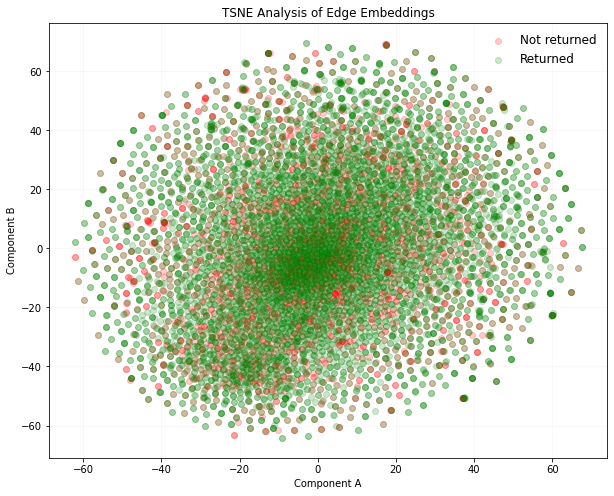

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
tsne = TSNE()
emb2d = tsne.fit_transform(newlist)

cdict = {0: "red", 1: "green"}
labeldict = {0: "Not returned", 1: "Returned"}

fig = plt.figure(figsize=(10,8))
ax = fig.gca()
for i in range(0,2):
    ix = np.where(np_labels_test == i)
    ax.scatter(emb2d[ix,0],emb2d[ix,1], marker="o", alpha=0.2, color=cdict[i], label=labeldict[i])
ax.set_title("TSNE Analysis of Edge Embeddings")
ax.legend(fontsize=12, frameon=False)
ax.set_xlabel("Component A")
ax.set_ylabel("Component B")
ax.grid(True, alpha=0.1)
plt.show()

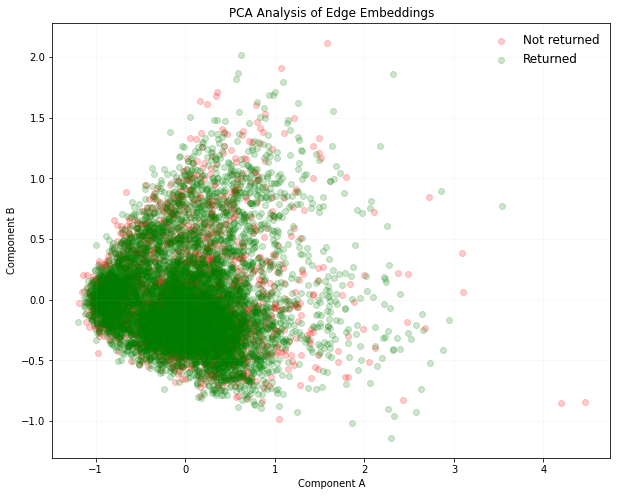

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
tsne = PCA()
emb2d = tsne.fit_transform(newlist)

cdict = {0: "red", 1: "green"}
labeldict = {0: "Not returned", 1: "Returned"}

fig = plt.figure(figsize=(10,8))
ax = fig.gca()
for i in range(0,2):
    ix = np.where(np_labels_test == i)
    ax.scatter(emb2d[ix,0],emb2d[ix,1], marker="o", alpha=0.2, color=cdict[i], label=labeldict[i])
ax.set_title("PCA Analysis of Edge Embeddings")
ax.legend(fontsize=12, frameon=False)
ax.set_xlabel("Component A")
ax.set_ylabel("Component B")
ax.grid(True, alpha=0.1)
plt.show()